In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# Load dataset
data = load_iris()

In [3]:
# Get features and target
X = data.data
y = data.target

# Get dummy variable (One-hot encoding)
y = pd.get_dummies(y).values
print(y[:3])

[[ True False False]
 [ True False False]
 [ True False False]]


In [4]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.shape[0]

# number of input features
input_size = 4

# number of hidden layer neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true) ** 2).sum() / (2 * y_pred.size)


def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()



In [6]:
# Training the network
for itr in range(iterations):
    # feedforward propagation
    # hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)


In [8]:
# Training the network
for itr in range(iterations):
    # feedforward propagation
    # hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)

    # Append the results to the DataFrame using .loc
    results.loc[len(results)] = {"mse": mse, "accuracy": acc} # Use .loc to add a new row to the DataFrame


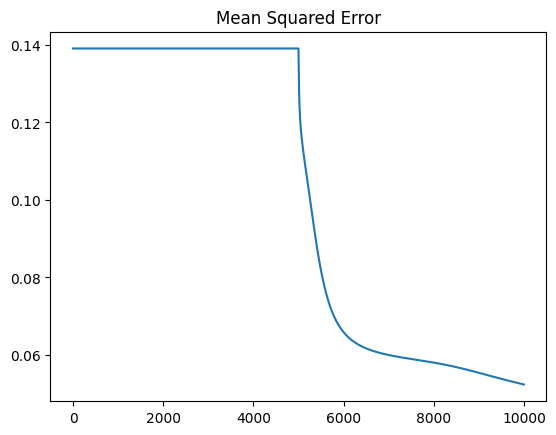

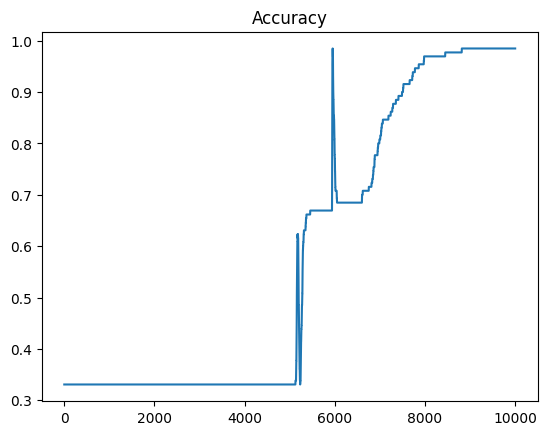

Accuracy: 0.95


In [10]:
# Training the network
for itr in range(iterations):
    # feedforward propagation
    # hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)

    # Append the results to the DataFrame using .loc
    results.loc[len(results)] = {"mse": mse, "accuracy": acc} # Use .loc to add a new row to the DataFrame

    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

# Plotting loss and accuracy
results.mse.plot(title="Mean Squared Error")
plt.show()

results.accuracy.plot(title="Accuracy")
plt.show()

# Testing
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))